In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
%matplotlib inline

# Small-World Networks

## Let's reproduce Fig 1 of the article

In [2]:
G_s=nx.watts_strogatz_graph(20,4,0)

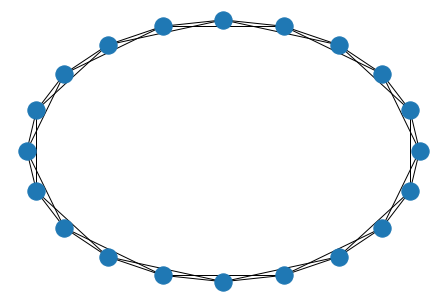

In [3]:
nx.draw_circular(G_s)

In [4]:
print('Average clustering coefficient = ',nx.average_clustering(G_s))
print('Average shortest path length = ',nx.average_shortest_path_length(G_s))

Average clustering coefficient =  0.5
Average shortest path length =  2.8947368421052633


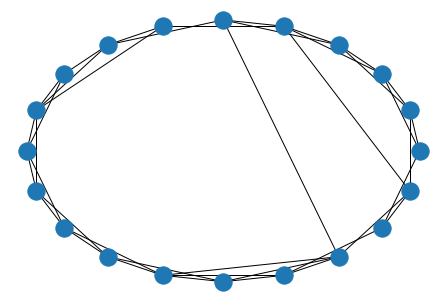

In [5]:
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.05,seed=123))

In [6]:
print('Average clustering coefficient = ',nx.average_clustering(nx.watts_strogatz_graph(20,4,0.05,seed=123)))
print('Average shortest path length = ',nx.average_shortest_path_length(nx.watts_strogatz_graph(20,4,0.1,seed=123)))

Average clustering coefficient =  0.38666666666666666
Average shortest path length =  2.3


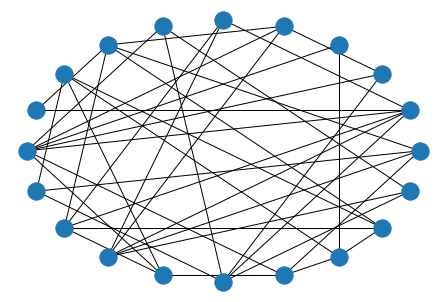

In [7]:
nx.draw_circular(nx.watts_strogatz_graph(20,4,1.0,seed=123))

In [8]:
print('Average clustering coefficient = ',nx.average_clustering(nx.watts_strogatz_graph(20,4,1,seed=123)))
print('Average shortest path length = ',nx.average_shortest_path_length(nx.watts_strogatz_graph(20,4,1,seed=123)))

Average clustering coefficient =  0.1780952380952381
Average shortest path length =  2.110526315789474


### Let's generate Figure 2 of the Paper

Generate **Watts-Strogatz model** graphs with the given parameters $n$ (number of nodes) and $k$ (average degree) with different values of $p$ (rewriting probablity). 

The range of $p$ is generated using the function `logspace`, which creates a list of logarithmically-spaced numbers. The range of $p$ is between $10^{-4}$ and $1$.

There are **2** main charactestics that are measured:

1.  **Clustering coefficient $C(p)$:**  This coefficient measures the **degree of clustering** between the nodes. It represents a **local measure** of the graph's connectivity. 
2.  **Average shortest-path length $L(p)$:**  This is the **average of the shortest path length** between every pair of nodes in the graph. This number represent the **global connectiviy** of the graph.



In [9]:
##### Watts-Strogatz model parameters #####

# Number of nodes (graph vertices)
n=1000
# Degree of the initial ring-lattice
k=10
# Resolution (number of different values of p, the rewiring probability)
r = 20

# Generate a set of r logarithmically spaced values of p
p_range=[0] + np.logspace( -4, 0, r ).tolist()

###### For each p, compute the characterstic measures of the Watt-Strogatz model (n,k,p) ####
clustering = []
sp_length  = []

for p in p_range:
    
    # Create a Watts-Strogatz graph
    graph = nx.watts_strogatz_graph( n, k, p )
    
    # Compute the average shortest-path length L(p)
    sp_length.append( nx.average_shortest_path_length( graph ) )

    # Compute the clustering coefficient C(p)
    clustering.append( nx.average_clustering( graph ) )

    print("[p=%.4f]: Clustering coefficient C(p)=%.4f,  Avg shortest path L(p)=%.4f" % (p, clustering[-1], sp_length[-1])) 
    sys.stdout.flush()

[p=0.0000]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0001]: Clustering coefficient C(p)=0.6664,  Avg shortest path L(p)=49.3608
[p=0.0002]: Clustering coefficient C(p)=0.6664,  Avg shortest path L(p)=40.3049
[p=0.0003]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0004]: Clustering coefficient C(p)=0.6655,  Avg shortest path L(p)=33.2045
[p=0.0007]: Clustering coefficient C(p)=0.6654,  Avg shortest path L(p)=33.3778
[p=0.0011]: Clustering coefficient C(p)=0.6648,  Avg shortest path L(p)=25.7311
[p=0.0018]: Clustering coefficient C(p)=0.6633,  Avg shortest path L(p)=20.3651
[p=0.0030]: Clustering coefficient C(p)=0.6593,  Avg shortest path L(p)=13.9168
[p=0.0048]: Clustering coefficient C(p)=0.6565,  Avg shortest path L(p)=11.7802
[p=0.0078]: Clustering coefficient C(p)=0.6525,  Avg shortest path L(p)=9.5677
[p=0.0127]: Clustering coefficient C(p)=0.6427,  Avg shortest path L(p)=8.2071
[p=0.0207]: Clustering coefficient C(p)=0.

### Step 2

### Test the **analytical values** of $C(p)$:


#### - The **clustering coefficient** has the following analytical value:
#### $C(p) = C(0)\times (1-p)^{3}  $

#### see references in: http://www.scholarpedia.org/article/Small-world_network

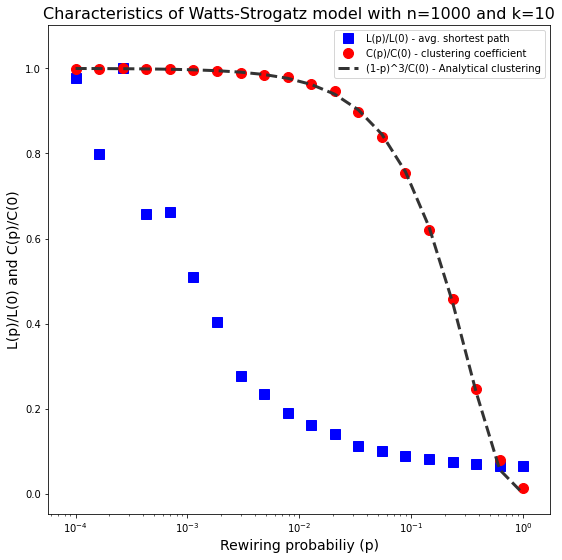

In [10]:

##### Plot L(p)/L(0) and C(p)/C(0) #####
plt.figure(1,figsize=(9,9))

plt.semilogx(p_range[1:] , [L / sp_length[0]  for L in sp_length[1:]]  , 'sb', markersize=10, label='L(p)/L(0) - avg. shortest path')
plt.semilogx(p_range[1:] , [C / clustering[0] for C in clustering[1:]] , 'or', markersize=10, label='C(p)/C(0) - clustering coefficient')
plt.semilogx(p_range[1:] , [ (1-p)**3.0 for p in p_range[1:]] , '--', color=[0.2,0.2,0.2], linewidth=3, markersize=12, label='(1-p)^3/C(0) - Analytical clustering')

# Extend the plot region to see the points at both ends
lims = plt.xlim()
plt.xlim([lims[0]*0.9, lims[1]*1.1]) 
lims = plt.ylim()
plt.ylim([lims[0]*0.95, lims[1]*1.05]) 


plt.title( "Characteristics of Watts-Strogatz model with n=%d and k=%d"%(n,k) , fontsize=16)
plt.xlabel( "Rewiring probabiliy (p)" , fontsize=14)
plt.ylabel( "L(p)/L(0) and C(p)/C(0)" , fontsize=14)
plt.legend( loc='best' )
plt.show()

## Let's try to generate a Small World  network model with 1000 links 300 nodes and clustering coefficient of 0.5

### k=2*1000/300 = 6.666, we can select k=6 or 8, if you select 7 the watts_strogatz function round it to the lowest even number.

In [11]:
C0 =  nx.average_clustering(nx.watts_strogatz_graph( 300, 6, 0 ))

#### $C(p) = C(0)\times (1-p)^{3}  $

In [12]:
p=1-pow(0.5/C0,1/3)

In [13]:
p

0.05896397111896978

In [144]:
gs =  nx.watts_strogatz_graph( 300, 6, p )

In [145]:
print('Average clustering coefficient = ',nx.average_clustering(gs))
print('Average shortest path length = ',nx.average_shortest_path_length(gs))
print ("Number of nodes:" , gs.number_of_nodes())
print ("Number of edges:" , gs.number_of_edges())
print ("2*Edges/N:" , 2*gs.number_of_edges()/gs.number_of_nodes())
print ("Average degree of  directed graph = ",np.mean(list(dict(gs.degree()).values())))

Average clustering coefficient =  0.5121904761904749
Average shortest path length =  5.797279821627647
Number of nodes: 300
Number of edges: 900
2*Edges/N: 6.0
Average degree of  directed graph =  6.0


## Let's try to generate a Erdos-Renyi network model with 1000 links 300 nodes and clustering coefficient of 0.5

### prg=2L/(n*(n-1))

In [146]:
prg = 2*1000/(300*299)

In [147]:
prg

0.022296544035674472

In [148]:
Ger = nx.erdos_renyi_graph(300, prg, seed=None, directed=False)

In [149]:
print('Average clustering coefficient = ',nx.average_clustering(Ger))
print('Average shortest path length = ',nx.average_shortest_path_length(Ger))
print ("Number of nodes:" , Ger.number_of_nodes())
print ("Number of edges:" , Ger.number_of_edges())
print ("2*Edges/N:" , 2*Ger.number_of_edges()/Ger.number_of_nodes())
print ("Average degree of  directed graph = ",np.mean(list(dict(Ger.degree()).values())))

Average clustering coefficient =  0.018113941613941604
Average shortest path length =  3.1779710144927535
Number of nodes: 300
Number of edges: 1019
2*Edges/N: 6.793333333333333
Average degree of  directed graph =  6.793333333333333


### Note: For the ER graph if we fix links we can't fix the clustering coefficient

## Let's try to generate a Barabasi-Albert network model with 1000 links 300 nodes and clustering coefficient of 0.5

In [150]:
Gba=nx.barabasi_albert_graph(300, 4,seed=123)

In [151]:
print('Average clustering coefficient = ',nx.average_clustering(Gba))
print('Average shortest path length = ',nx.average_shortest_path_length(Gba))
print ("Number of nodes:" , Gba.number_of_nodes())
print ("Number of edges:" , Gba.number_of_edges())
print ("2*Edges/N:" , 2*Gba.number_of_edges()/Ger.number_of_nodes())
print ("Average degree of  directed graph = ",np.mean(list(dict(Gba.degree()).values())))

Average clustering coefficient =  0.09163885086343061
Average shortest path length =  2.753578595317726
Number of nodes: 300
Number of edges: 1184
2*Edges/N: 7.8933333333333335
Average degree of  directed graph =  7.8933333333333335


## Let's compare the degree distributions

Text(0, 0.5, 'P(k)')

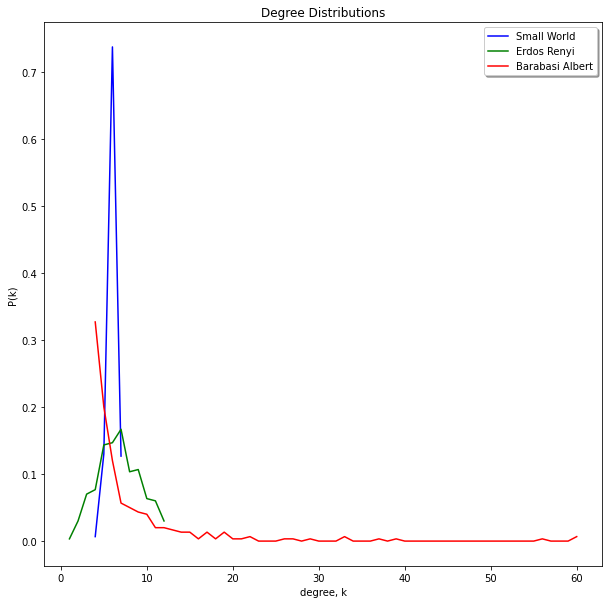

In [152]:
#G1:
degs1 = list(dict(nx.degree(gs)).values())
n1, bins1 = np.histogram(degs1, bins = list(range(min(degs1), max(degs1)+1, 1)), density="True")

#G2:
degs2 = list(dict(nx.degree(Ger)).values())
n2, bins2 = np.histogram(degs2, bins = list(range(min(degs2), max(degs2)+1, 1)), density="True")

#G3:
degs3 = list(dict(nx.degree(Gba)).values())
n3, bins3 = np.histogram(degs3, bins = list(range(min(degs3), max(degs3)+1, 1)), density="True")

#to plot:
plt.figure(figsize=(10,10)) #use once and set figure size

plt.plot(bins1[:-1],n1,'b-', markersize=10, label="Small World") 
plt.plot(bins2[:-1],n2,'g-', markersize=10, label="Erdos Renyi") 
plt.plot(bins3[:-1],n3,'r-', markersize=10, label="Barabasi Albert") 
plt.legend(loc='upper right', shadow=True)
plt.title('Degree Distributions')
plt.xlabel('degree, k')
plt.ylabel('P(k)')

## It is common to find the log log representation to better observe the structure

Text(0, 0.5, 'P(k)')

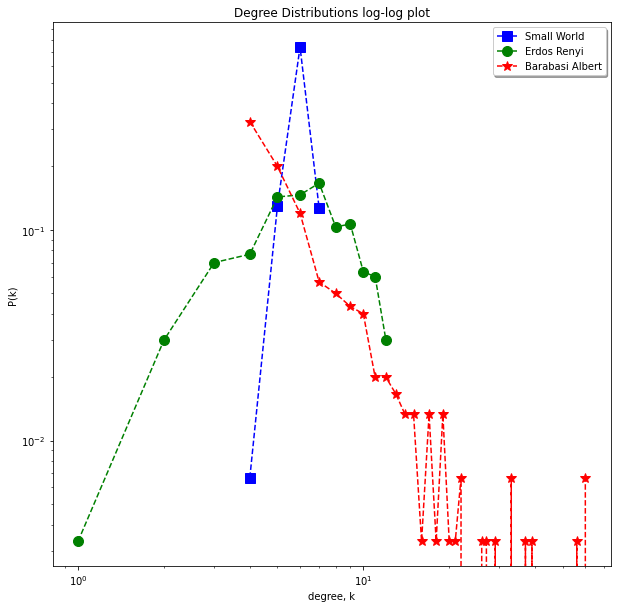

In [153]:
plt.figure(figsize=(10,10)) #use once and set figure size
plt.loglog(bins1[:-1],n1,'bs--', markersize=10, label="Small World") 
plt.loglog(bins2[:-1],n2,'go--', markersize=10, label="Erdos Renyi") 
plt.loglog(bins3[:-1],n3,'r*--', markersize=10, label="Barabasi Albert")
plt.legend(loc='upper right', shadow=True)
plt.title('Degree Distributions log-log plot')
plt.xlabel('degree, k')
plt.ylabel('P(k)')
